In [1]:
import os,sys,inspect
os.chdir('../')


from simulator import * 
import preprocessing.deconvolution as deconv
import preprocessing.autoencoders 
import detector.naive_detector
import utils

import numpy as np
import matplotlib.pyplot as plt


In [2]:
sim = simulator(100, 1)
print(sim)

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1


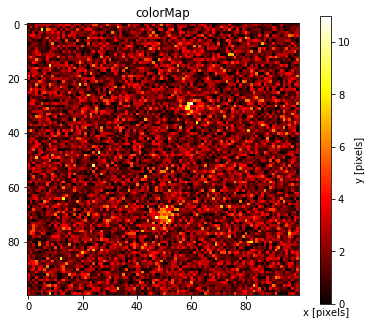

Instance info:
img_size: 100
exposure_time: 1
atom_variance: 5
quantum_efficiency: 1
atom count: 2
photons_in_background is set to 1 by default
SNR: 5
x0: [50 60]
y0: [70 30]


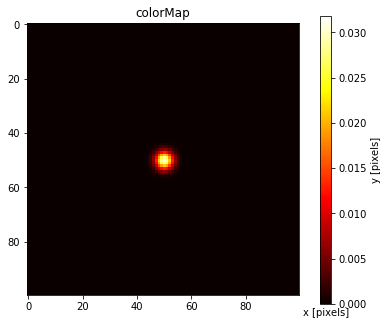

In [3]:
raw_image = sim.create_simulation_from_SNR([50, 60], [70,30], 5, verbose=True)
kernel = utils.gaussian_kernel(100, sim.variance, verbose=True)





Preprocessing:
------------------


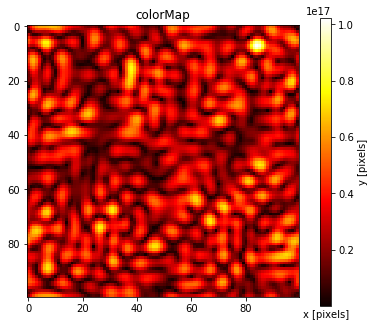

In [4]:
inv_filtered_image = deconv.inv_filter(raw_image, kernel)
visualize(inv_filtered_image)

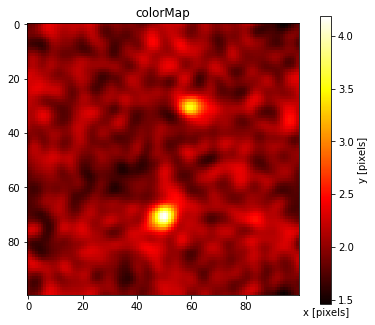

In [5]:
regularized_filtered_image = deconv.regularized_filter(raw_image, kernel, alpha=1)
visualize(regularized_filtered_image)

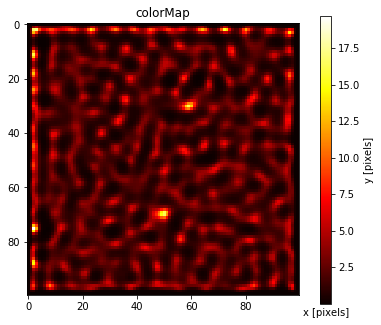

In [10]:
rl_filtered_image = deconv.richardson_lucy_deconv(raw_image, kernel, 30)
visualize(rl_filtered_image)


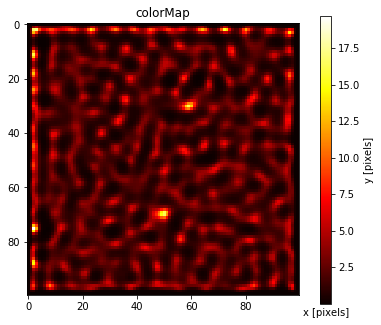

In [17]:
from skimage import restoration
deconvolved_RL = restoration.richardson_lucy(raw_image, kernel, iterations=30, clip=False)
visualize(deconvolved_RL)

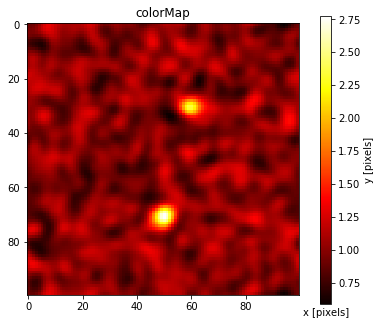

In [7]:
wiener_filtered_image = deconv.wiener_deconv(raw_image, kernel)
visualize(wiener_filtered_image)